# Supporting Material: Imbalanced Learning in Astronomy

**Author:** Dr. Robert Lyon

**Contact:** robert.lyon@manchester.ac.uk

**Institution:** University of Manchester

**Affiliation:** SKA Group, Time Domain Team (TDT)

**Version:** 1.0

**Date: 04/04/2018**

**Acknowledgements:** This notebook utilises data obtained by the High Time Resolution Universe Collaboration using the Parkes Observatory, funded by the Commonwealth of Australia and managed by the CSIRO. The data was originally processed by Dr. Daniel Thornton & Dr. Samuel Bates. I gratefully acknowledge their efforts. 

I make use of a Python library called $\textrm{imblanced-learn}$ in this notebook. This was written by Guillaume Lemaître, Fernando Nogueira and Christos Aridas as part of their work,

_"Imbalanced-learn: A Python Toolbox to Tackle the Curse of Imbalanced Datasets in Machine Learning", Journal of Machine Learning Research (JLMR), vol.18, number 17, 2017._

Their work can be found [via the JLMR website](http://jmlr.org/papers/v18/16-365).

I greatly appreciate their efforts.

## Introduction
This notebook explores the issues that reduce the accuracy of Machine Learning (ML) algorithms, used for candidate classification. It was written to support a talk I delivered at European Week of Astronomy and Space Science (EWASS) meeting in 2018. The talk is entitled: 

*Imbalanced Learning In Astronomy*

The notebook dissects the class imbalance problem through interactive Python code (Python version 3.6). I explore the key concepts and issues via a tutorial style. To run the code you require the $\textrm{numpy}$, $\textrm{scipy}$, $\textrm{scikit-learn}$, and $\textrm{imbalanced-learn}$ libraries. The notebook assumes some basic background knowledge in statistics and machine learning, but is pitched at a general astronomy audience that may have limited ML experience.

## Code & License
The code and the contents of this notebook are released under the GNU GENERAL PUBLIC LICENSE, Version 3, 29 June 2007.

## Citation Request

I kindly request that if you make use of the notebook, please cite the work using the following $\textrm{Bibtex}$ source and using the repository DOI.


I also humbly request that you cite the paper that this notebook supports to make the work more visible.

## Background
If comfortable with ML, statistics or decision theory, please feel free to skip the following sub-sections. They are meant primarily for those new to the field.
### Observations and Data
We use instruments to measure the world around us. For example we can use a thermostat to measure temperature, a questionnaire to measure opinions or record details, and ground-based telescopes to measure electromagnetic radiation arriving at the Earth's surface. In each case, measurements yield data. 

When we take a measurement, we're making an observation. Observational data can be numerical, textual, categorical, or a combination thereof. In the case of a thermostat, it takes temperature measurements at a specific point in time, producing a single numerical value. If the temperature within a room drops below a pre-determined level (i.e. becomes too cold), the measurements from the thermostat can be used to automatically turn a heating system on to compensate. The performance of the system depends on the thermostat providing accurate measurements. Otherwise a room or building could become too hot, or too cold.

There are many factors that contribute to cooling or heating an arbitrary room. These include the current state of a potential heating system (on/off), the temperature outside, the time of day, the time of year, or even the body heat emitted by people within the room. There are many variables to consider, and these are but a few.

Usually we don't care about all the details - the room is either too hot, or too cold. But what about in situations where heat management is critically important? Say, in the heart of a computer server room or nuclear reactor. Here temperature changes can cause problems. In these scenarios is it generally desirable to keep equipment cool for optimal performance. If the temperature increases too much, it may become necessary to cool things down. Perhaps by increasing the airflow, using air conditioning/cooling liquids, or even turning some machines/the reactor off. Such actions have safety implications and a financial cost. Ideally we'd like to take pre-emptive action to stop any adverse conditions arising. Perhaps by making predictions.

Making such predictions is hard! There are many variables to consider. To proceed we usually make a set of assumptions regarding which variables matter most, and focus on those. So for example, let's not worry about the heat added to the server room by people. This is the best we can do with imperfect knowledge. Ideally we'd like to fully understand the processes at play in these scenarios. But what does "understand the process" actually mean?

### Functions
We can quantify this mathematically via functions. A function is just an input/output box. It accepts input in the form of data, and produces data as output via a mathematical formula. We can use functions to model very complicated scenarios more easily.

**Example**

Consider the server room example. There are a large number of factors determining the room's temperature at any given moment (outside temperature, airflow, number of computers, computational load, time of day etc.). We can't keep track of all these variables - that would be incredibly impractical. Yet we can think of the room as an input/output box that accepts all these variables as inputs, and yields the temperature as output. 

In nature there exists a mathematical formula for this function. Given *all* (potentially infinite) input variables, it would return the exact temperature that results, without error. This function can be represented via:


<img src="images/png/F_x.png" width="70">

Where $x$ represents the input. In many cases we'd like to obtain this function. For the server room it would allow us to predict the state of the room now, and anytime in the future with complete certainty - for any set of input variables. This predictive power could be used to great effect. The cost savings achievable in terms of power alone would be huge - decreased power consumption, increased equipment life-time, fewer hardware failures etc.

However to find $f(x)$ we require a dataset accurately describing the infinite variety of input variables and output states. This is clearly infeasible! 

Instead we can observe a server room over a fixed period of time - perhaps we can use that information? Experts collect monitoring data over weeks, months and sometimes even years. The data provides a detailed picture of how input variables map to output states. As more data is collected, the picture becomes clearer. 

Suppose a server room is monitored from January to March. The data collected describes a subset of the inputs and outputs of $f(x)$. It doesn't cover the summer months, so we don't have data associated with higher summer temperatures. The data we have is therefore incomplete compared to what's needed to produce $f(x)$. 

Instead we have a data sample that describes a simplified version of the server room, who’s input and output states are produced by the closely related function:


<img src="images/png/F_x_prime.png" width="80">

This function represents an approximate view of $f(x)$, in this case from January to March. It is important to remember that it is obtained using technological observing instruments and tools. Such human made devices are imperfect and inadvertently introduce errors/noise (e.g. system noise, human-induced bias etc.). Thus the approximation is imperfect in many ways.

**Why relevant to Machine Learning?**

Suppose we want to make predictions using the monitoring data collected in the server room. The data consists of input variables from a set $X$, and a set of resulting output states from a set $Y$. For example, if $x=$CPU temperature greater than 90 degrees, then $y=$ overheating.

The goal of machine learning **classification** (also known as pattern recognition) is to perform the mapping from $X$ to $Y$ on new, unseen data; i.e. data not described by $f(x)^{\prime}$. This is depicted in a summary diagram below.


<img src="images/png/Mapping_X_to_Y.png" width="400">

In other words, can we use the data from January to March to predict for the rest of the year? Machine learning classifiers **can** achieve this. Principally, by computing a mathematical function that automatically performs the mapping from $X$ to $Y$, as accurately as possible. The computed generic classification function can be denoted as:

<img src="images/png/F_x_prime_prime.png" width="80">

Yet this function is imperfect too! In fact, it has more imperfections than $f(x)^{\prime}$. This is because it's made additional assumptions inorder to perform the mapping from $X$ to $Y$. To illustrate this, suppose that when the server room was observed, the external temperature never rose above $11^{\circ}c$. Therefore the room's air conditioning was never observed under the strain of warm summer months. Since $f(x)^{\prime}$ doesn't currently capture this temporal pattern, neither can $f(x)^{\prime\prime}$. The classification function will thus likely produce unhelpful predictions during the summer months. 

What if our experts take some new observations during the summer months - but forget to account for the time of day as an input variable? Here $f(x)^{\prime}$ is certainly more complete, yet it fails to capture the temperature fluctuations that occur during a normal day. But it's usually cooler in the morning and warmer in the afternoon when most people are working. This is important, since a server room will be under most load during the working day. As $f(x)^{\prime}$ still doesn't capture this, neither will $f(x)^{\prime\prime}$. Once again, this leads to unreliable predictions.

There are some important lessons here:

* we must choose the correct input variables to observe.
* we must observe them over a representative period of time.
* ideally we must capture all representative states of the process being observed.
* we must reduce bias and observing error where possible.

### Bringing it together
Taking all these functions together we can paint a simple picture. There is a function describing the perfect underlying data. Then a function describing the data we actually collect - this is what we begin to do science with. Then there's the function describing the interpretations we make via ML algorithms and other methods - this includes errors collected when observing, plus errors we may make during analysis.


<img src="images/png/data_capture_overview.png" width="500">

### Computing a function?
So far "computing a function" is an abstract concept. It raises questions - how is this achieved? Is a heuristic used? How is it useful?

It's perhaps best illustrated via a trivial example. Consider the mapping problem in the image below. Here $X$ contains a set of heating configurations that consume power levels defined in $Y$. On the left-hand side we can see that some examples in $X$ have been linked to levels in $Y$. For example an input level of 4 corresponds to an output level of 16 (units unimportant). These items in $X$ have been mapped to items in $Y$. In other words these have been **labelled** (the ground truth mapping is known). 

The function that does the mapping is missing on the left-hand side. How might one be found? Well, you search for one...

Machine learning algorithms are fundamentally optimisation functions. These are functions that search for an optimal set of parameters that minimise or maximise some **objective** function. Where the objective is to make as many correct predictions as possible (or the inverse). This can be easily quantified via a count of the errors made (though more complex in practice!). Such an objective function is given below:


\begin{eqnarray}
\sum_{i=1}^{n} \delta[f(x_{i})^{\prime\prime}\neq y_{i}] \textrm{,}
\end{eqnarray}

where $\delta[i]$ an indicator function that returns 1 if the condition within it evaluates to true, else 0. So here if the prediction of $f(x_{i})^{\prime\prime}$ doesn't match with the known label $y_{i}$, $\delta$ returns 1.

Lets use that function to optimise a contrived classifier,

\begin{eqnarray}
f(x_{i})^{\prime\prime} = x^{a} \textrm{,}
\end{eqnarray}

where $a$ is the parameter to be optimised.


On the right we see two attempts at finding a function mapping $X$ to $Y$. The first uses $a=1.5$, which produces 5 errors and 0 correct predictions. By setting $a=2$ we find an optimal solution, which achieves 0 errors and 5 correct predictions. Typically there would be steps in between during a parameter search e.g. $a=1.6$, $a=1.61$,..., $a=1.71$, $a=1.7$, ... found via e.g. gradient descent or some other method.

Here the search is easy as the problem is so simple. Yet at a fundamental level this is how machine learning classifiers work. Except the functions have multiple terms to be optimised according to the type of classifier used. Different classifiers use different objective functions, and different methods for parameter search. There are thousands of potential classifiers.


<img src="images/png/PracticalMLExampleFunctionsSimple.png" width="600">

Now we move onto a formal computer science description of machine learning.

## Machine Learning

ML is a branch of artificial intelligence (A.I.), concerned with replicating and improving upon the human ability to learn. ML is comprised of multiple sub-fields, each supported by extremely active research communities. Here we are concerned with applying the tools from a specific area of ML known as pattern recognition - also known as statistical classification. The goal of classification is to automatically categorise items, objects, and data points, as accurately as possible. Human beings are capable of undertaking sophisticated classification tasks with ease, given appropriate training. This is due to our innate ability to categorise via trial and error. ML algorithms learn in a similar way, however using statistical tools (see Bishop 2006, and Lyon 2016 for a review).

The aim of classification is to build functions that accurately map a set of input data points, to a set of **class** labels. This means mapping each input example to it's correct **label**. If $X=\lbrace x_{\rm 1}, \ldots , x_{\rm n} \rbrace $ represents an input dataset, then $x_{\rm i}$ is an individual example represented by variables known as **features**. Features describe the characteristics of an example such that $x_{\rm i} = \lbrace x_{\rm i}^{\rm j},...,x_{\rm i}^{\rm m} \rbrace$, where each feature $x_{\rm i}^{\rm j} \in \mathbb{R}$ for $j=1, \ldots , m$. 

The **class label** $y$ is also associated with each example. This can take many possible values so long as $y \in Y$. The class label can be numerical or textual. Though typically each $y$ is an integer value correpsonding to some class category where $y \in Y=\lbrace y_{\rm 1}, \ldots, y_{\rm k} \rbrace$. It is common for only binary labels to be considered such that $y\in Y=\lbrace -1,1 \rbrace$. Where $y_{\rm 1}=-1$ equates to the non-target class (synonymous with negative) and $y_{\rm 2}=1$ to target class (synonymous with positive). In the pulsar domain, we consider the pulsar class to be the target (positive), and all others (noise, interference) to be non-target (negative)

The features used to describe examples must be chosen after careful consideration. Features must be useful for separating the classes under consideration. For the **binary** two-class case, assuming only positive and negative classes, the feature distributions for examples with the label $y_{\rm 1}=-1$ must differ from the distributions for examples with the label $y_{\rm 1}=1$. These distributions must be separable, which can be quantified mathematically, i.e. via distance measures. Feature separability is depicted in the image below according to individual features. Here $\phi$ depicts an optimal separation between the classes.


<img src="images/png/Split_Point_1.png" width="500">

An ML function 'learns' to separate examples from different classes, using the feature data from a labelled input vector known as the **training set** $T_{train}$. It contains pairs such that $T_{train}=\lbrace (x_{\rm 1},y_{\rm 1}),\ldots,(x_{\rm n},y_{\rm n})\rbrace$. 

Think of the training set as the information available to a student prior to an examination. This information must be descriptive, (i.e. the features must contain useful information), and reflect what the topic of the exam. A classifier induces a mapping function between examples and labels based on the data in $T_{train}$. It does this by attempting to minimise the mapping errors it makes on the training examples. This process is known as **'training'**. 

The trained function is used to label new **unseen** candidates in the **'test set'** $T_{test}$. The test should be a sample of independent examples used to test the trained classifier, or the real world data the classifier is asked to classify. 

### The i.i.d Assumption via an example
Today students are subjected to many formal examinations throughout their time in education. To pass those exams, students must prepare, typically by studying the material to be covered in the exam. If the student works hard and learns the subject material, they'll likely do well. Machine learning algorithms are not much different. They're extremely 'studious' when it comes to learning from the material they are given.

Occasionally an exam board and/or school make a mistake when preparing for an exam. Sometimes students are given the wrong exam paper, or taught the wrong subject material. The outcome is usually not good - especially for the students, as their results will suffer. This outcome doesn't make them bad students. Rather, the circumstances are less than favourable! 

What I've described here via a simple analogy is a violation of the i.i.d assumption. The i.i.d assumption implies the following. 

_So long as the data used to train a classifier, is distributionally similar to the information it will be tested on, it will do well. Otherwise, it will likely perform poorly._

Much like for students, violations of the i.i.d assumption are not the fault of an individual classifier. Thus poor test results say little about i) the classifier used, ii) it's effectiveness on the problem at hand, ii) it's potential etc. Given the right information, the same algorithm could perform extremely well. It may even be the best algorithm for a particular problem. 

However, whereas it is easy to realise that students have been given the incorrect exam/subject material, it is much harder to know when we've poorly trained our algorithms. Differences between training data and real data can be so subtle, that they are impossible to spot via a cursory analysis. Can you spot subtle distributional differences in an n-dimensional dataset - because I usually can't! 

To mitigate these issues we have to be diligent teachers. We have to be sure we are giving our algorithms the best chance to learn the concepts we're trying to teach them. This means we must understand our data first, to guard against fundamental i.i.d violations. When the i.i.d assumption is violated, no machine learning classifier can be expected to perform well. This relates back to the discussion of functions in the background section.

### When i.i.d is Violated

The i.i.d assumption holds when the feature data supplied in the training set $T_{train}$, is independent from the feature data in $T_{test}$, yet identically distributed. The i.i.d assumption is violated when,

* The data used to train a classifier comes from a different source/data distribution, to the data the classifier will be applied to. For example, suppose a classifier is trained to recognise RFI using data collected at the Parkes telescope, but is deployed upon data obtained at the Green Bank Telescope.
* The data used to train and test a classifier, initially comes from the same source/data distribution. However over time, the distribution of the data being classified changes - either slowly, or abruptly. For example, the RFI environment surrounding most radio telescopes is subject to change over varying time-scales due to human activity. Any change causes a violation of the i.i.d. assumption. In the machine learning research literature, this problem is known more widely as distributional drift, or concept drift.
* The data used to train and test a classifier, initially comes from the same source/data distribution. However the data is post-processed in a different way to the data collected post-training. This could happen during a survey. For example, if a problem is spotted in the pre-processing, and a correction made which alters the data distributions.

These violations can easily occur, and perhaps unwittingly.


### Learning Process
The machine learning process is summarised in the diagram below. The process begins with the collection of data. The data sample is initially studied by human experts, and labelled as accurately as possible (human labelling error is possible). Once the labelled data is available, it is re-sampled into distinct subsets. These include,

* a training set.
* a test set.
* an optional validation set.

Next a classification model is chosen as a candidate solution, after studying available/relevant options. The classification model is initially 'taught' using the training data. This is known as the **'training'** phase. Once training is complete the **'testing'** phase begins. Here data from the test set are passed through the classification model, and the predictions collected. The predictions are evaluated against the ground truth labels we already have from the data collection phase. If the model performs well, then the system can be deployed. If not, we return to the training phase. Either with the same classifier, or a new one. The entire process is repeated until good performance is achieved. Whilst this is a simplified picture, it should suffice for this work.

<img src="images/png/LearningProcessSummary.png" width="500">

### Evaluation
ML classifiers are simply functions. The output of functions can be visualised, making them easier to understand. Earlier in the background section I introduced the contrived classifier,

\begin{eqnarray}
f(x_{i})^{\prime\prime} = x^{a} \textrm{.}
\end{eqnarray}

We found that $a=2$ was the optimal parameter choice, and we now visualise the function output below.

<img src="images/png/FunctionVisualised.png" width="550">

We can see that the function produces a simple parabola. This isn't very useful for classification! Yet visualising a classification function's output in the presence of data, allows us to evaluate how well it works. Suppose there's a classifier described via a simple linear function. It produces a single line through our data as shown in the image below.

<img src="images/png/DecisionBoundary.png" width="350">

This dashed line is more commonly known as a **'decision boundary'**. Here the data are partitioned by the boundary. Data points falling on the left hand side are assigned the positive label, those on the right the negative label. Depending on the true class of each example and where they fall w.r.t the decision boundary, there are four possible outcomes in a binary classification problem. These are summarised in the Table below which is known as a **confusion matrix**.

|            |          |   **Predicted Label**   |   **Predicted Label**   |
|:----------:|:--------:|:-------------------:|:-------------------:|
|            |          |       Negative      |       Positive      |
| **True Label** | Negative |  True Negative (TN) | False Positive (FP) |
| **True Label** | Positive | False Negative (FN) |  True Positive (TP) |

From these outcomes we can quantify how well a classifier performs. We do this using some common metrics such as accuracy, precision, and recall. These are described in the Table below.

|        **Metric**       | **Description**                                             |                         ** Definition**                         |
|:-------------------------:|---------------------------------------------------------------|:----------------------------------------------------------------:|
|          Accuracy         | Measure of overall classification accuracy.                   |                  $\frac{(TP+TN)}{(TP+FP+FN+TN)}$                 |
| False positive rate (FPR) | Fraction of negative instances incorrectly labelled positive. |                       $\frac{FP}{(FP +TN)}$                      |
|         Precision         | Fraction of retrieved instances that are positive.            |                       $\frac{TP}{(TP+FP)}$                       |
|           Recall          | Fraction of positive instances that are retrieved.            |                      $\frac{TP}{(TP + FN)}$                      |
|        Specificity        | Fraction of negatives correctly identified as such.           |                      $ \frac{TN}{(FP + TN)}$                     |
|          F-Score          | Measure of accuracy that considers both precision and recall. | $2\times{ \frac{precision\times{recall}} {precision + recall}} $ |

Ideally we'd like a classifier that produces high levels of recall and accuracy, whilst simultaneously minimising the false positive rate. This becomes especially important as our data becomes increasingly complex. Complex data usually require more sophisticated decision boundaries to attain a clear class separation. Even in the trivial example shown in the image below, we can see how a perfect boundary might look. This greatly improves on the simple linear separator, but is more difficult to compute.

<img src="images/png/Complex_boundary_1.png" width="300">

## Imbalanced Learning Problem

For binary classification problems, the class skew can be characterised by the imbalance ratio $IR$,

\begin{eqnarray}
IR & = & \frac{|\lbrace (x_{i},y_{i}) | y_{i} \in Y \land y_{i}=y_{1} \rbrace |}{|\lbrace (x_{i},y_{i}) | y_{i} \in Y \land y_{i}=y_{2} \rbrace |} \textrm{.}
\end{eqnarray}

Here $y_{1}$ is the minority class such that $0 < | y_{1} | < | y_{2}| $, and $y_{2}$ is therefore the majority class.

Algorithms trained upon such data exhibit two general properties:
* High training accuracy as the $IR$ approaches zero, where the cardinality of the majority class approaches infinity. This is achievable, since the majority class examples form an increasingly large proportion of the training set. Therefore the strategy that yields the greatest reduction in training set error, involves always predicting the majority class label. Thus classification models trained on such data, can become biased towards the majority class.
* Poor minority class generalisation performance, particularly with respect to recall. Given that the training set is so imbalanced, $P(y_{1}|x_{i})$ (probability of $y_{1}$ for $x_{i}$) approaches zero as $\lim_{IR} \to 0$. In such cases $y_{1}$ is rarely if ever predicted.

These are effects of what is known as the imbalanced learning problem. Imbalanced learning is concerned with overcoming these issues, in data sets that exhibit severe class imbalances where $IR < 0.1$ and worse. There are many discernible types of data imbalance that cause such problems (see He & Garcia, 2009). There are i) **intrinsic imbalances**, which are caused by the nature of the data space. There are ii) **extrinsic imbalances** caused by data collection techniques, and perhaps not attributable to a naturally imbalanced data distribution. Then there are iii) **relative imbalances**, occurring when a minority class is not rare, just small relative to the majority class. Whilst iv) **absolute rarity** pertains to situations where the minority class instances are genuinely rare, which naturally makes learning difficult. Finally there may be v) **sub-class imbalances**, whereby a single class is made up of numerous distinct subclasses, that are themselves imbalanced in one of the ways already described.

Training a classifier on an imbalanced dataset does not necessarily mean poor generalisation performance. If the training data are discriminative enough to separate the different classes in data space, then the classifier will perform well regardless of the imbalance. A contrived example of this is shown in the image below.


<img src="images/png/NoImbalanceProblem.png" width="400">

It demonstrates that the underlying class distribution alone is not the root cause of poor performance on imbalanced data. Rather it is characteristics often possessed by imbalanced data sets, that make it difficult for a classifier to separate the minority and majority classes. These include,

* **class inseparability**, which describes the overlapping nature of data from different classes. See a) in the image below.
* **small disjuncts**, which occur when a concept is comprised of smaller disconnected sub-concepts. Small disjuncts are a problem as they cover only a few training cases. Many training examples are therefore usually required to characterise all the individual disjuncts. See b) in the image below.
* the **small sample size** problem, which occurs when there are too few minority class examples available for learning. See c) in the image below.

Ultimately these characteristics conspire to make it difficult for a classifier to construct an optimal decision boundary, leading to sub-optimal classifier performance.


<img src="images/png/Imbalance_no_axis.png" width="400">

## Solutions

There are three generic approaches used to tackle a classification task. 

* Methods that assign labels to examples, according to their distance from some cluster centre. This is shown in a) below.
* Methods that attempt to separate classes using decision boundaries. Class labels are assigned according to which side an example falls upon. Typically requires a region in data space that has a low density of examples, through which the boundary can be drawn. This is shown in b) below. 
* Instance-based methods,  that assign labels to new examples according to the majority label of their $n$ nearest neighbours. This is shown in c) below, via a typical nearest neighbour approach.

There are other approaches, but these suffice for now.

<img src="images/png/LearningAssumptions.png" width="300">

For each of these approaches, there are many ways to overcome the problems associated with class imbalance. Here we consider the most generic, often very succesfully applied.

### Random Under-sampling

In Random Under-sampling (RUS), majority class are instances are randomly omitted from the data set to balance the class distribution. Suppose we begin with data as shown in the image below.

<img src="images/png/UndersampleBefore.png" width="200">

The goal is to randomly under-sample producing a more balanced data set:

<img src="images/png/UndersampleAfter.png" width="200">

Next let's create some imbalanced data to play with. We'll create a reasonable imbalance first. We'll use a 1:20 ratio, i.e. there are 20 majority class examples for each minority class example. In total 800 examples will be created.

/Users/rob/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


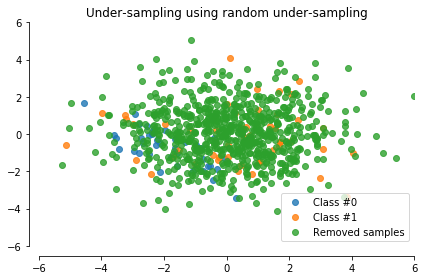

Size of the variables involved
y length:  800
X length:  800
y resampled length:  90
x resampled length:  90


In [178]:
# This is a modified version of the code originally 
# written by Christos Aridas and Guillaume Lemaitre
# <g.lemaitre58@gmail.com>, released under the MIT
# License.

# Plotting library.
import matplotlib.pyplot as plt

# For some math we need to do.
import numpy as np

# Use the Sklearn library to make datasets,
# and perform an anlysis.
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# The code that actually does the random undersampling.
from imblearn.under_sampling import RandomUnderSampler

# Generate a dataset to experiment with. Here I explain what this
# function does, and what the parameters mean on their first use. 
# Where I use them elsewhere, return to here for a recap.
# 
# n_classes : int, optional (default=2)
# The number of classes (or labels) of the classification problem.
#
# class_sep : float, optional (default=1.0)
# The factor multiplying the hypercube size. Larger values spread
# out the clusters/classes and make the classification task easier.
#
# weights : list of floats or None (default=None)
# The proportions of samples assigned to each class. If None, then
# classes are balanced. Note that if len(weights) == n_classes - 1, 
# then the last class weight is automatically inferred. More than
# n_samples samples may be returned if the sum of weights exceeds 1.
#
# n_informative : int, optional (default=2)
# The number of informative features. Each class is composed of a
# number of gaussian clusters each located around the vertices of
# a hypercube in a subspace of dimension n_informative. For each
# cluster, informative features are drawn independently from 
# N(0, 1) and then randomly linearly combined within each cluster
# in order to add covariance. The clusters are then placed on the 
# vertices of the hypercube.
# 
# n_redundant : int, optional (default=2)
# The number of redundant features. These features are generated
# as random linear combinations of the informative features.
#
# flip_y : float, optional (default=0.01)
# The fraction of samples whose class are randomly exchanged.
# Larger values introduce noise in the labels and make the 
# classification task harder.
#
# n_samples : int, optional (default=100)
# The number of samples.
# 
# random_state : int, RandomState instance or None, optional (default=None)
# If int, random_state is the seed used by the random number 
# generator; If RandomState instance, random_state is the 
# random number generator; If None, the random number generator 
# is the RandomState instance used by np.random.
#
# For more details of this sklearn function, visit:
# 
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

X, y = make_classification(n_classes=2, class_sep=1, weights=[0.05, 0.95],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20  , n_clusters_per_class=1,
                           n_samples=800  , random_state=10)

# So now have a dataset to play with...

# Build a PCA object for visualisation. PCA decomposes a dataset
# of high dimensionality, into one of low dimensionality. It converts
# a set of observations of possibly correlated variables into a set
# of values of linearly uncorrelated variables called principal components.
#
# See https://en.wikipedia.org/wiki/Principal_component_analysis
# for more details.
pca = PCA(n_components=2)

# Now we have data reduced to just 2 principal components - this makes
# it much easier to plot (can't plot high dimensionality data!).

# Fit and transform x to visualise inside a 2D feature space. What does this 
# mean? It means we take the original data from the higher dimensional space,
# and apply the principal component analysis output, to reduce it to just 2
# dimensions.
#
# For more details of this function checkout,
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
X_vis = pca.fit_transform(X)

# Now apply the random under-sampling method.
#
# return_indices : bool, optional (default=False)
# Whether or not to return the indices of the samples randomly selected
# from the majority class.
#
# We need the indices of the selected majority class exmaples for plotting.
rus = RandomUnderSampler(ratio=0.8,return_indices=True)

# Produce the resampled data sets for X and Y
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)

# Now apply the same PCA as earlier, to get the reseampled X data,
# in to the 2D space.
X_res_vis = pca.transform(X_resampled)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                   idx_resampled)

idx_class_0 = y_resampled == 0

# Here we add the scatter points for each class, using an alpha
# of 0.8. so they have some transparency.
plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1],
            alpha=.8, label='Class #0')
plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1],
            alpha=.8, label='Class #1')
plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1],
            alpha=.8, label='Removed samples')

# Build the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

# Make it visible...
plt.title('Under-sampling using random under-sampling')
plt.legend()
plt.tight_layout()
plt.show()

# To help understand whats happened, lets double check the
# sizes of the variables involved.

print ("Size of the variables involved")
print ("y length: ",len(y))
print ("X length: ",len(X))

print ("y resampled length: ",len(y_resampled))
print ("x resampled length: ",len(X_resampled))


But how does under-sampling affect classification performance on this data? There are some experiments we can do. But we also need an evaluation metric insensitive to class skew. 

The G-Mean is not sensitive to class distributions. It describes the ratio of positive to negative accuracy irrespective of class size. We'll use it here along with some other standard metrics.


\begin{equation}
\textrm{G-Mean} = \sqrt{\frac{TP}{TP+FN}\times \frac{TN}{TN+FP}}
\end{equation}

There are two simple experiments to try now.

1. Test how well a simple classifier performs on the original data.
2. Compare that to how well the same classifier performs on the randomly undersampled data.

In [179]:
# We have a couple of relevant data sources. There is,
#
# X - the input data.
# y - the labels corresponding to the examples in X
# X_resampled - the randomly undersampled version of X.
# y_resampled - the labels corresponding to the examples in X_resampled
#
#
# There is then a simple experiment we can do:
#
# 1. Test how well a simple classifier performs on the original data.
# 2. Compare that to how well the same classifier performs on the 
#    randomly undersampled data.
#
# For each test we have to build and evaluate a seaprate classifier.
# For simplicity we use the Naive Bayes classifier, for details see:
# https://en.wikipedia.org/wiki/Naive_Bayes_classifier

# Experiment 1a.

# First lets get our inputs together.
X_before = X
Y_before = y

# Now lets generate test and training sets from the data before
# random undersampling was applied. We use the function,
# train_test_split() to do this. The parameter test_size simply
# insicates what proportion of the data should be used for the
# training set. Here we simply say half in the training set, 
# half in the test set.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_before, Y_before, test_size=0.5)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape)) 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now make some predcitions for the likely labels
# using the trained classifier.
y_predicted = classifier.predict(x_test)

# If we import some metrics we can evaluate the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print ("\nAccuracy :", accuracy_score(y_test,y_predicted))
print ("Recall   :", recall_score(y_test,y_predicted))
print ("Precision:", precision_score(y_test,y_predicted))
print ("F1 Score :", f1_score(y_test,y_predicted))

# Next we can get the confusion matrix:
cm = confusion_matrix(y_test,y_predicted)

# I have provided my own custom class that can be used to
# evaluate classifier performance. I use this now to verify the
# values obtained above, and to obtain the G-mean. This is a
# metric insensitive to the imbalance. This custom class expects a
# confusion matrix as an input, with the following formatting:
#                               
# [[TN   FN]
# [ FP  TP]]

# Import custom code
from EvaluationStats import ClassifierStats

# Create object
stats = ClassifierStats(cm)

# Print the results
print ("\nCustom accuracy: ", stats.getAccuracy())
print ("Recall   :", stats.getRecall())
print ("Precision:", stats.getPrecision())
print ("F1 Score :", stats.getfScore())
print ("G-mean   :", stats.getGMean())

print("\n The outputs should match - but look a the G-mean... that's very low.")
# You'll notice the custom results are more precise.   


Examples in training set:  400
Examples in testing set:  400
Dimensions of training set:  (400, 20)
Dimensions of testing set:  (400, 20)

Accuracy : 0.9325
Recall   : 0.958115183246
Precision: 0.970822281167
F1 Score : 0.96442687747

Custom accuracy:  0.9325
Recall   : 0.9708222811671088
Precision: 0.9581151832460733
F1 Score : 0.9644268774703557
G-mean   : 0.5435693615261898

 The outputs should match - but look a the G-mean... that's very low.


Now we determine how under-sampling impacts performance.

In [180]:
# Experiment 2a.
# We do the same as before, except with the undersampled data.

# Let's get our inputs together.
X_after  = X_resampled
Y_after  = y_resampled

# Now lets generate test and training sets from the data before
# random undersampling was applied. We use the function,
# train_test_split() to do this. The parameter test_size simply
# insicates what proportion of the data should be used for the
# training set. Here we simply say half in the training set, 
# half in the test set.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_after, Y_after, test_size=0.5)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape)) 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now make some predcitions for the likely labels
# using the trained classifier.
y_predicted = classifier.predict(x_test)

# If we import some metrics we can evaluate the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print ("\nAccuracy :", accuracy_score(y_test,y_predicted))
print ("Recall   :", recall_score(y_test,y_predicted))
print ("Precision:", precision_score(y_test,y_predicted))
print ("F1 Score :", f1_score(y_test,y_predicted))

# Next we can get the confusion matrix:
cm = confusion_matrix(y_test,y_predicted)

# I have provided my own custom class that can be used to
# evaluate classifier performance. I use this now to verify the
# values obtained above, and to obtain the G-mean. This is a
# metric insensitive to the imbalance. This custom class expects a
# confusion matrix as an input, with the following formatting:
#                               
# [[TN   FN]
# [ FP  TP]]

# Import custom code
from EvaluationStats import ClassifierStats

# Create object
stats = ClassifierStats(cm)

# Print the results
print ("\nCustom accuracy: ", stats.getAccuracy())
print ("Recall   :", stats.getRecall())
print ("Precision:", stats.getPrecision())
print ("F1 Score :", stats.getfScore())
print ("G-mean   :", stats.getGMean())

print("\n The outputs should match - and the G-mean has increased - sampling has made it easier to find the minority class.")
# You'll notice the custom results are more precise. 


Examples in training set:  45
Examples in testing set:  45
Dimensions of training set:  (45, 20)
Dimensions of testing set:  (45, 20)

Accuracy : 0.822222222222
Recall   : 0.884615384615
Precision: 0.821428571429
F1 Score : 0.851851851852

Custom accuracy:  0.8222222222222222
Recall   : 0.8214285714285714
Precision: 0.8846153846153846
F1 Score : 0.8518518518518519
G-mean   : 0.8224783208299743

 The outputs should match - and the G-mean has increased - sampling has made it easier to find the minority class.


We see the G-mean improve between experiment 1 and experiment 2. Thus under-sampling has made it easier to identify the minority class. However the results are not great. Accuracy has dropped - but that's ok. You now have to take into consideration that in experiment 1, there were 400 examples in the training set. Whilst in experiment 2, there were only 90 examples. Thus in experiment 2 there was much less information to learn from. The key then is to carefully under-sample, without removing examples that contain a lot of information.

### Random Over-sampling

In Random Over-sampling (RUS), minority class are instances are randomly dupliacted to balance the class distribution. Suppose we begin with data as shown in the image below.

<img src="images/png/Oversample_before.png" width="200">

The goal is to randomly over-sample producing a more balanced data set:

<img src="images/png/OversampleAfter.png" width="200">

So how does this over-sampling affect classification performance? We'll use the G-mean again, and mostly the same code to keep things simple. First we'll create some new data. This time we'll make the imbalanced worse. We'll use a 1:20 ratio, i.e. there are 20 majority class examples for each minority class example. In total 800 examples will be created.

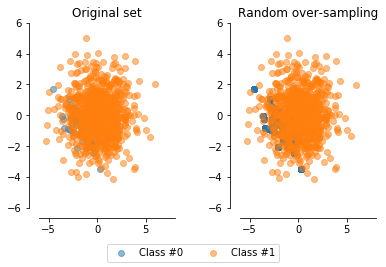

Size of the variables involved
y length:  800
X length:  800
y resampled length:  1520
x resampled length:  1520


In [185]:
# This is a modified version of the code originally 
# written by Christos Aridas and Guillaume Lemaitre
# <g.lemaitre58@gmail.com>, released under the MIT
# License.

# The code that actually does the random oversampling.
from imblearn.over_sampling import RandomOverSampler

# Make a dataset, same as before.
X, y = make_classification(n_classes=2, class_sep=1, weights=[0.05, 0.95],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20  , n_clusters_per_class=1,
                           n_samples=800  , random_state=10)

# Used to more easily visualise the data, as before.
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

# Now apply the random over-sampling method...
ros = RandomOverSampler(ratio='minority')

# Produce the resampled data sets for X and Y
X_resampled, y_resampled = ros.fit_sample(X, y)

# Now apply the same PCA as earlier, to get the reseampled X data,
# in to the 2D space.
X_res_vis = pca.transform(X_resampled)

X_resampled, y_resampled = ros.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('Random over-sampling')

# Make a nice plot.
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

# Show the plot.
plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

# To help understand whats happened, lets double check the
# sizes of the variables involved.

print ("Size of the variables involved")
print ("y length: ",len(y))
print ("X length: ",len(X))

print ("y resampled length: ",len(y_resampled))
print ("x resampled length: ",len(X_resampled))



As before, lets do two experiments to better understand how classifier accuracy is impacted by over-sampling.

In [186]:
# Experiment 1b.

# First lets get our inputs together.
X_before = X
Y_before = y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_before, Y_before, test_size=0.5)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape)) 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now make some predcitions for the likely labels
# using the trained classifier.
y_predicted = classifier.predict(x_test)

# If we import some metrics we can evaluate the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print ("\nAccuracy :", accuracy_score(y_test,y_predicted))
print ("Recall   :", recall_score(y_test,y_predicted))
print ("Precision:", precision_score(y_test,y_predicted))
print ("F1 Score :", f1_score(y_test,y_predicted))

# Next we can get the confusion matrix:
cm = confusion_matrix(y_test,y_predicted)

# I have provided my own custom class that can be used to
# evaluate classifier performance. I use this now to verify the
# values obtained above, and to obtain the G-mean. This is a
# metric insensitive to the imbalance. This custom class expects a
# confusion matrix as an input, with the following formatting:
#                               
# [[TN   FN]
# [ FP  TP]]

# Import custom code
from EvaluationStats import ClassifierStats

# Create object
stats = ClassifierStats(cm)

# Print the results
print ("\nCustom accuracy: ", stats.getAccuracy())
print ("Recall   :", stats.getRecall())
print ("Precision:", stats.getPrecision())
print ("F1 Score :", stats.getfScore())
print ("G-mean   :", stats.getGMean())

print("\n The outputs should match - but look a the G-mean... thats pretty much Zero!")
# You'll notice the custom results are more precise.   


Examples in training set:  400
Examples in testing set:  400
Dimensions of training set:  (400, 20)
Dimensions of testing set:  (400, 20)

Accuracy : 0.9175
Recall   : 0.94502617801
Precision: 0.967828418231
F1 Score : 0.956291390728

Custom accuracy:  0.9175
Recall   : 0.967828418230563
Precision: 0.9450261780104712
F1 Score : 0.9562913907284768
G-mean   : 0.46375961642753455

 The outputs should match - but look a the G-mean... thats pretty much Zero!


Now lets see what over-sampling the minority class did.

In [187]:
# Experiment 2b.

# Let's get our inputs together.
X_after  = X_resampled
Y_after  = y_resampled

# Now lets generate test and training sets from the data before
# random undersampling was applied. We use the function,
# train_test_split() to do this. The parameter test_size simply
# insicates what proportion of the data should be used for the
# training set. Here we simply say half in the training set, 
# half in the test set.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_after, Y_after, test_size=0.5)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape)) 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now make some predcitions for the likely labels
# using the trained classifier.
y_predicted = classifier.predict(x_test)

# If we import some metrics we can evaluate the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print ("\nAccuracy :", accuracy_score(y_test,y_predicted))
print ("Recall   :", recall_score(y_test,y_predicted))
print ("Precision:", precision_score(y_test,y_predicted))
print ("F1 Score :", f1_score(y_test,y_predicted))

# Next we can get the confusion matrix:
cm = confusion_matrix(y_test,y_predicted)

# I have provided my own custom class that can be used to
# evaluate classifier performance. I use this now to verify the
# values obtained above, and to obtain the G-mean. This is a
# metric insensitive to the imbalance. This custom class expects a
# confusion matrix as an input, with the following formatting:
#                               
# [[TN   FN]
# [ FP  TP]]

# Import custom code
from EvaluationStats import ClassifierStats

# Create object
stats = ClassifierStats(cm)

# Print the results
print ("\nCustom accuracy: ", stats.getAccuracy())
print ("Recall   :", stats.getRecall())
print ("Precision:", stats.getPrecision())
print ("F1 Score :", stats.getfScore())
print ("G-mean   :", stats.getGMean())

print("\n The outputs should match - and the G-mean has improved.")
# You'll notice the custom results are more precise. 


Examples in training set:  760
Examples in testing set:  760
Dimensions of training set:  (760, 20)
Dimensions of testing set:  (760, 20)

Accuracy : 0.882894736842
Recall   : 0.856777493606
Precision: 0.910326086957
F1 Score : 0.882740447958

Custom accuracy:  0.8828947368421053
Recall   : 0.9103260869565217
Precision: 0.8567774936061381
F1 Score : 0.8827404479578392
G-mean   : 0.8833343099334419

 The outputs should match - and the G-mean has improved.


Once again we can see that re-sampling has greatly improved the G-mean. At the same time, it's becoming clear that there's a trade-off between accuracy and the G-mean. This is the case. If a classifier is more likely to predict the minority class, then it is more likely to make false positive predictions. Perhaps targeted sampling will help?

### Targeted Sampling

There are many methods that can be used to achieve targeted re-sampling. We consider just one here called One Sided Selection (OSS, Kubat & Matwin, 1997). OSS under-samples the majority class 'intelligently'. It does so by removing instances considered noisy, borderline, or redundant. This assumes noisy examples overwhelm the minority class, thus by removing them an improvement in performance can be achieved. The OSS approach tries to remove the unhelpful examples using Tomek links. Given two instances $x_{1}$ and $x_{2}$, each with a different class label, denote by $\Phi(x_{1},x_{2})$ the distance between them. The pair $(x_{1},x_{2})$ is called a Tomek link (Tomek, 1976), if there exists no instance $x_{3}$ such that $\Phi(x_{1},x_{3})<\Phi(x_{1},x_{2})$ or $\Phi(x_{2},x_{3})<\Phi(x_{2},x_{1})$. This is shown in the image below. If an instance is part of such a link, then it is considered to be borderline or noisy and removed.


<img src="images/png/TomekLink.png" width="300">

Lets create some new data, and test out OSS. We'll use an imbalance ratio of 1 to 20, and generate 800 examples.

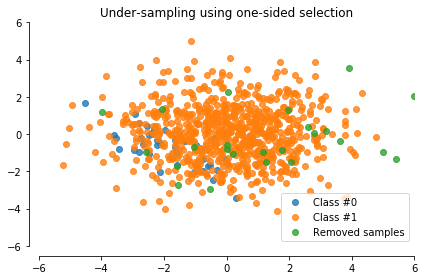

In [188]:
# This is a modified version of the code originally 
# written by Christos Aridas and Guillaume Lemaitre
# <g.lemaitre58@gmail.com>, released under the MIT
# License.

from imblearn.under_sampling import OneSidedSelection

# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=1, weights=[0.05, 0.95],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=800, random_state=10)

# To make visualisation easier.
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

# Apply One-Sided Selection
oss = OneSidedSelection(return_indices=True)

# Perform the sampling
X_resampled, y_resampled, idx_resampled = oss.fit_sample(X, y)

# Transform to 2D space.
X_res_vis = pca.transform(X_resampled)

# Create a plot...
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                   idx_resampled)

idx_class_0 = y_resampled == 0
plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1],
            alpha=.8, label='Class #0')
plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1],
            alpha=.8, label='Class #1')
plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1],
            alpha=.8, label='Removed samples')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

# Show the plot
plt.title('Under-sampling using one-sided selection')
plt.legend()
plt.tight_layout()
plt.show()

Now we determine what classification performance is like, prior to applying OSS.

In [189]:
# Experiment 1c.

# First lets get our inputs together.
X_before = X
Y_before = y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_before, Y_before, test_size=0.5)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape)) 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now make some predcitions for the likely labels
# using the trained classifier.
y_predicted = classifier.predict(x_test)

# If we import some metrics we can evaluate the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print ("\nAccuracy :", accuracy_score(y_test,y_predicted))
print ("Recall   :", recall_score(y_test,y_predicted))
print ("Precision:", precision_score(y_test,y_predicted))
print ("F1 Score :", f1_score(y_test,y_predicted))

# Next we can get the confusion matrix:
cm = confusion_matrix(y_test,y_predicted)

# I have provided my own custom class that can be used to
# evaluate classifier performance. I use this now to verify the
# values obtained above, and to obtain the G-mean. This is a
# metric insensitive to the imbalance. This custom class expects a
# confusion matrix as an input, with the following formatting:
#                               
# [[TN   FN]
# [ FP  TP]]

# Import custom code
from EvaluationStats import ClassifierStats

# Create object
stats = ClassifierStats(cm)

# Print the results
print ("\nCustom accuracy: ", stats.getAccuracy())
print ("Recall   :", stats.getRecall())
print ("Precision:", stats.getPrecision())
print ("F1 Score :", stats.getfScore())
print ("G-mean   :", stats.getGMean())

print("\n The outputs should match - but look a the G-mean... thats poor!")
# You'll notice the custom results are more precise.   


Examples in training set:  400
Examples in testing set:  400
Dimensions of training set:  (400, 20)
Dimensions of testing set:  (400, 20)

Accuracy : 0.94
Recall   : 0.958224543081
Precision: 0.978666666667
F1 Score : 0.968337730871

Custom accuracy:  0.94
Recall   : 0.9786666666666667
Precision: 0.95822454308094
F1 Score : 0.9683377308707124
G-mean   : 0.5935654976495854

 The outputs should match - but look a the G-mean... thats poor!


Now lets check what impact OSS had.

In [190]:
# Experiment 2c.

# Let's get our inputs together.
X_after  = X_resampled
Y_after  = y_resampled

# Now lets generate test and training sets from the data before
# random undersampling was applied. We use the function,
# train_test_split() to do this. The parameter test_size simply
# insicates what proportion of the data should be used for the
# training set. Here we simply say half in the training set, 
# half in the test set.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_after, Y_after, test_size=0.5)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape)) 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now make some predcitions for the likely labels
# using the trained classifier.
y_predicted = classifier.predict(x_test)

# If we import some metrics we can evaluate the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print ("\nAccuracy :", accuracy_score(y_test,y_predicted))
print ("Recall   :", recall_score(y_test,y_predicted))
print ("Precision:", precision_score(y_test,y_predicted))
print ("F1 Score :", f1_score(y_test,y_predicted))

# Next we can get the confusion matrix:
cm = confusion_matrix(y_test,y_predicted)

# I have provided my own custom class that can be used to
# evaluate classifier performance. I use this now to verify the
# values obtained above, and to obtain the G-mean. This is a
# metric insensitive to the imbalance. This custom class expects a
# confusion matrix as an input, with the following formatting:
#                               
# [[TN   FN]
# [ FP  TP]]

# Import custom code
from EvaluationStats import ClassifierStats

# Create object
stats = ClassifierStats(cm)

# Print the results
print ("\nCustom accuracy: ", stats.getAccuracy())
print ("Recall   :", stats.getRecall())
print ("Precision:", stats.getPrecision())
print ("F1 Score :", stats.getfScore())
print ("G-mean   :", stats.getGMean())

print("\n The outputs should match - and the G-mean has improved.")
# You'll notice the custom results are more precise. 


Examples in training set:  388
Examples in testing set:  388
Dimensions of training set:  (388, 20)
Dimensions of testing set:  (388, 20)

Accuracy : 0.932989690722
Recall   : 0.967213114754
Precision: 0.961956521739
F1 Score : 0.964577656676

Custom accuracy:  0.9329896907216495
Recall   : 0.9619565217391305
Precision: 0.9672131147540983
F1 Score : 0.9645776566757494
G-mean   : 0.6203084786585238

 The outputs should match - and the G-mean has improved.


Note that this time, the accuracy difference between the non-OSS and OSS results is only around 5%. Yet the G-mean has improved. That's a decent return for very little work.

### Artificial Examples
There are many approaches available for building artificial data points. Perhaps the most popular right now are Generative Adversarial Networks (GANs). For simplicity, I'm only going to discuss a single standard method here.

#### SMOTE
The Synthetic Minority Over-sampling Technique (SMOTE,Chawla et. al., 2002), inserts synthetically generated minority class examples (based on existing minority examples) in to a sampled data set. It odes this to balance the class distribution. SMOTE uses $k$-nearest neighbours to determine which nearby examples are most similar to a minority class example. 

The nearest neighbours are then used to generate a new synthetic example. This is done by first choosing a template minority class example, near which a new synthetic example should be generated. A random nearest neighbour of this template is then chosen. The features of the neighbouring example are combined with the features of the template, to form an entirely new example. This process is repeated until the required number of synthetic examples have been created. The synthetic examples are combined with the real minority examples to form a new training set. SMOTE ultimately balances the training set by under-sampling the majority class via random omission, until the desired $IR$ is reached.


<img src="images/png/SMOTE.png" width="200">

As before lets create some data. As for OSS, We'll use an imbalance ratio of 1 to 20, but this time generate 500 examples.


SMOTE Method:  SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None) 

Acc before    :  0.98800 Acc after    :  0.99368
Rec. before   :  0.99578 Rec. after   :  1.00000
Prec. before  :  0.99160 Prec. after  :  0.98760
F1 before     :  0.99368 F1 after     :  0.99376
G-mean before :  0.91792 G-mean after :  0.99362

SMOTE Method:  SMOTE(k=None, k_neighbors=5, kind='borderline1', m=None, m_neighbors=10,
   n_jobs=1, out_step=0.5, random_state=None, ratio='auto',
   svm_estimator=None) 

Acc before    :  0.98800 Acc after    :  0.99789
Rec. before   :  0.99167 Rec. after   :  1.00000
Prec. before  :  0.99582 Prec. after  :  0.99556
F1 before     :  0.99374 F1 after     :  0.99777
G-mean before :  0.94472 G-mean after :  0.99801

SMOTE Method:  SMOTE(k=None, k_neighbors=5, kind='borderline2', m=None, m_neighbors=10,
   n_jobs=1, out_step=0.5, random_state=None, ratio='auto',
   svm_estimator=Non

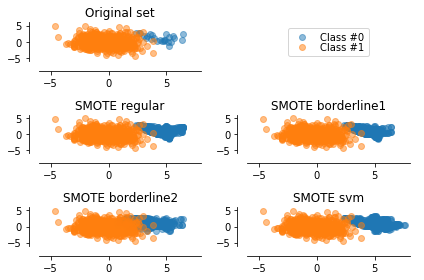

In [165]:
# This is a modified version of the code originally 
# written by Fernando Nogueira, Christos Aridas and 
# Guillaume Lemaitre <g.lemaitre58@gmail.com>,
# released under the MIT License.

# This function is used to produce a more complicated SMOTE plot.
def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1

from imblearn.over_sampling import SMOTE

# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.05, 0.95],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=500, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)


# Note there a many varieties of SMOTE. I'll leave these
# here to play with. 
kind = ['regular', 'borderline1', 'borderline2', 'svm']


# Apply regular SMOTE
sm = [SMOTE(kind=k) for k in kind]

X_resampled = []
y_resampled = []
X_res_vis   = []

# Here we loop over all possible SMOTE Methods
for method in sm:
    
    # For each SMOTE method, apply and resample
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))
    
    # Because this code runs in a loop over all SMOTE
    # methods, we do the before and after experiments
    # pretty much together.
    ###########################
    # Get test/train splits
    ###########################
    # For experiment 1d
    X_before = X
    Y_before = y
    
    # For experiment 2d
    X_after = X_res
    Y_after = y_res
    
    from sklearn.model_selection import train_test_split
    
    examples_before_total = int(len(Y_before))
    examples_after_total  = int(len(Y_after))
    
    # For experiment 1d
    x_train_bef, x_test_bef, y_train_bef, y_test_bef = train_test_split(X_before, Y_before, test_size=0.5)
    
    # For experiment 2d
    x_train_aft, x_test_aft, y_train_aft, y_test_aft = train_test_split(X_after, Y_after, test_size=0.5)
    
    ###########################
    # Build classifiers
    ###########################
    from sklearn.naive_bayes import GaussianNB
    classifier_bef = GaussianNB()
    classifier_aft = GaussianNB()
    
    # Train the before data, and after data classifiers.
    classifier_bef.fit(x_train_bef, y_train_bef)
    classifier_aft.fit(x_train_aft, y_train_aft)
    
    ###########################
    # Make predictions
    ###########################
    # Now make some predcitions for the likely labels
    # using the trained classifier.
    y_predicted_bef = classifier_bef.predict(x_test_bef)
    y_predicted_aft = classifier_aft.predict(x_test_aft)
    from sklearn.metrics import confusion_matrix

    # Next we can get the confusion matrix:
    cm_bef = confusion_matrix(y_test_bef,y_predicted_bef)
    cm_aft = confusion_matrix(y_test_aft,y_predicted_aft)
    
    ###########################
    # Evaluate
    ###########################
    from EvaluationStats import ClassifierStats

    # Create object
    stats_bef = ClassifierStats(cm_bef)
    stats_aft = ClassifierStats(cm_aft)
    
    # Print the results
    print ("\nSMOTE Method: ", str(method),"\n")
    print ("Acc before    : ", '{0:.5f}'.format(stats_bef.getAccuracy()) ,"Acc after    : ",'{0:.5f}'.format(stats_aft.getAccuracy()))
    print ("Rec. before   : ", '{0:.5f}'.format(stats_bef.getRecall())   ,"Rec. after   : ",'{0:.5f}'.format(stats_aft.getRecall()))
    print ("Prec. before  : ", '{0:.5f}'.format(stats_bef.getPrecision()),"Prec. after  : ",'{0:.5f}'.format(stats_aft.getPrecision()))
    print ("F1 before     : ", '{0:.5f}'.format(stats_bef.getfScore())  ,"F1 after     : ",'{0:.5f}'.format(stats_aft.getfScore()))
    print ("G-mean before : ", '{0:.5f}'.format(stats_bef.getGMean())    ,"G-mean after : ",'{0:.5f}'.format(stats_aft.getGMean()))
  
    
    # Here we can evaluate all the SMOTE methods together,
    # before and after they've bee applied.

    
#############
# Plotting
#############

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')

for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)

plt.tight_layout()
plt.show()

Again we've improved the G-mean, and like with OSS, had little effect on the accuracy rate!

### Algorithms Robust to Imbalance
Some machine learning algorithms are more robust to imbalance than others. The decision tree is one such algorithm, depicted in the image below. It partitions the data space in such a way, that it overcomes some of the problems associated with disjuncts. I don't describe this algorithm here in detail, more detail can be found elsewhere (Bishop, 2006).


<img src="images/png/SplitPointTree.png" width="500">

Hopefully the examples provided thus far will help you get to grips with the imbalanced learning problem. Perhaps you’ll be able to apply the code to some of your own data.

## Bonus - Pulsar Data
Pulsar data is extremely imbalanced. The $IR$ is typically as low as $0.0001$. That’s 10,000 non-target class examples, for every example of interest. In the sections that follow I show how pulsar data can be read, pre-processed, scaled, and machine learning features extracted. This will demonstrate the basic principles behind how we do machine learning in practice.

### Example Data
The input data consists of integrated pulse profiles, collected during the Medium Latitude portion of the High Time Resolution Universe Survey (HTRU) (see Thornton 2013 and Bates et. al. 2012). The data is comprised of $1,586$ pulsar and $8,852$ non-pulsar candidate profiles. Each profile contains exactly 128 phase bins. The data contains 725 of the known 1,108 pulsars (known at the time) in the Medium Latitude survey region (see Levin 2012), along with re-detections and harmonics. The data also contains noise examples, along with strong and weak forms of Radio Frequency Interference (RFI). This data is not to be confused with the [HTRU 2 feature data](https://dx.doi.org/10.6084/m9.figshare.3080389.v1) made available by Lyon et. al. (2016) - the feature data contains only machine learning features extracted from candidates, whilst this data set is made up of integrated pulse profiles only.

### Loading the Data

Here we simply load in the integrated pulse profile data, from files in the provided distribution. There are two files to be read in. The first contains integrated profiles for pulsars, the second contains noise and RFI profiles.

In [191]:
# The HTRU 2 profile data is split - one file containing the real pulsar
# profiles, one file containing noise/interference profiles. We load both
# these data sources here. First we construct relative paths to the files.
data_dir = 'data/HTRU2'
pulsar_file = data_dir + '/HTRU2_pulsar.csv'
nonpulsar_file = data_dir + '/HTRU2_nonpulsar.csv'

# Now simply load the data.
pulsar_data = genfromtxt(pulsar_file, dtype=np.int,delimiter=',')
non_pulsar_data = genfromtxt(nonpulsar_file, dtype=np.int,delimiter=',')

# Print overview details.
print ('\n\nTotal number of pulsar profiles: ', len(pulsar_data))
print ('Total number of noise/RFI profiles: ', len(non_pulsar_data))



Total number of pulsar profiles:  1586
Total number of noise/RFI profiles:  8852


Now we plot a single example of both classes, to show what the data looks like. First the pulsar example.

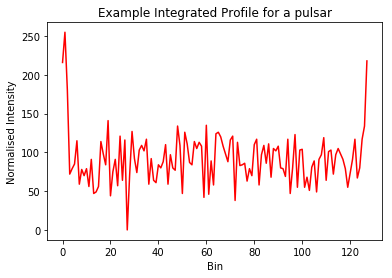

In [192]:
figure(1)
plot(pulsar_data[7], 'r')
xlabel('Bin')
ylabel('Normalised Intensity')
title('Example Integrated Profile for a pulsar')
show()

It is clear that the peak is not in the centre. For most examples it is, but not for all. How about for the non-pulsar examples?

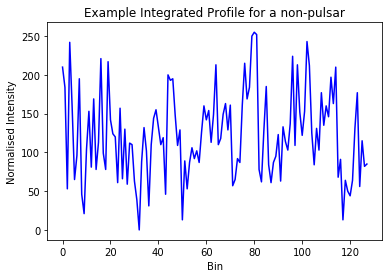

In [168]:
figure(2)
plot(non_pulsar_data[0], 'b')
xlabel('Bin')
ylabel('Normalised Intensity')
title('Example Integrated Profile for a non-pulsar')
show()

The non-pulsar example doesn't appear to be correctly centred either. So we centre the data using a simple function. We define this function below:

In [169]:
import operator

def centre_on_peak(data):
    """
    Centre the data such that the maximum y-axis value is in the
    centre of the data.

    Parameters
    ----------
    :param data: the data to be centred.

    Returns
    ----------
    :return: the centred data array.
    """
    # Stores the centred data.
    centred_data = []

    # Get the index of the maximum value.
    index, value = max(enumerate(data), key=operator.itemgetter(1))

    # Find midpoint of the data.
    midpoint = int(len(data)/2)

    # Figure out the shift required to centre the data (put max value in centre bin).
    n = midpoint - index  # N gives the number of bins the data should be shifted.
    a = n % len(data)

    # Apply the correction.
    centred_data = numpy.concatenate([data[-a:],data[:-a]])

    return centred_data

Now we execute this centering function.

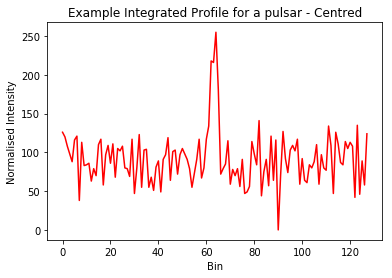

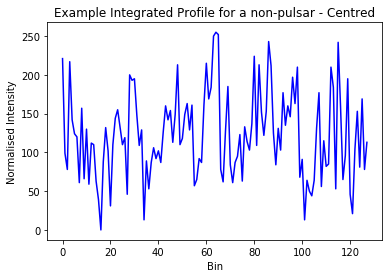

In [170]:
# Here we simply loop over each item in the data arrays,
# and update their values.
for i in range(0, len(pulsar_data)):
    pulsar_data[i] = centre_on_peak(pulsar_data[i])
    
for i in range(0, len(non_pulsar_data)):
    non_pulsar_data[i] = centre_on_peak(non_pulsar_data[i])
    
figure(3)
plot(pulsar_data[7], 'r')
xlabel('Bin')
ylabel('Normalised Intensity')
title('Example Integrated Profile for a pulsar - Centred')
show()

figure(4)
plot(non_pulsar_data[0], 'b')
xlabel('Bin')
ylabel('Normalised Intensity')
title('Example Integrated Profile for a non-pulsar - Centred')
show()

Now the data is correctly loaded and centred, we can move on. How about we compute some machine learning features from the data? We can use the features devised by Lyon et.al. 2016. The code provided below will allow us to extract these.

---

In [171]:
def compute_features(data):
    """
    Computes machine learning feature values for the supplied data array.

    Parameters
    ----------
    :param data: a data array.

    Returns
    ----------
    :return: the computed machine learning features as a list [mean, stdev, shew, kurtosis].
    """
    if data is not None:  # Check data is not empty

        if len(data) > 0:

            # Sums computed during calculation.
            mean_sum = 0
            mean_subtracted_sum_power_2 = 0
            mean_subtracted_sum_power_3 = 0
            mean_subtracted_sum_power_4 = 0

            # The number of data points in the array.
            n = len(data)

            # Necessary first loop to calculate the sum, min and max
            for d in data:
                mean_sum += float(d)
            
            if mean_sum > 0 or mean_sum < 0:  # If the mean is less than or greater than zero (should be)
                
                # Update the mean value.
                mean_value = mean_sum / float(n)

                # Now try to compute the standard deviation, using
                # the mean computed above... we also compute values in
                # this loop required to compute the excess Kurtosis and
                # standard deviation.

                for d in data:
                    
                    mean_subtracted_sum_power_2 += power((float(d) - mean_value), 2.0)

                    # Used to compute skew
                    mean_subtracted_sum_power_3 += power((float(d) - mean_value), 3.0)

                    # Used to compute Kurtosis
                    mean_subtracted_sum_power_4 += power((float(d) - mean_value), 4.0)

                # Update the standard deviation value.
                stdev = sqrt(mean_subtracted_sum_power_2 / (n - 1.0))
                # Next try to calculate the excess Kurtosis and skew using the
                # information gathered above.

                one_over_n = 1.0 / n  # Used multiple times...

                kurt = ((one_over_n * mean_subtracted_sum_power_4) / power((one_over_n * mean_subtracted_sum_power_2), 2) ) - 3

                skew = (one_over_n * mean_subtracted_sum_power_3) / power(sqrt(one_over_n * mean_subtracted_sum_power_2), 3)
                    
                return [mean_value, stdev, skew, kurt]
                
            else:  # Data sums to zero, i.e. no data!
                return [0,0,0,0]
            
        else:  # Data empty for some reason...
            return [0,0,0,0]

### Feature Extraction Unit Test
Now we want to test our feature extraction function works correctly. To do this, we write two important types of test.

#### Test 1: Expected Outputs from Theory
A Gaussian distribution with a mean of 0, and a standard deviation of 1, should have a skew of 0, and a kurtosis of 0. These values are derivable from theory, and are known to be correct. We can test our function works well, by comparing the values it computes for such a Gaussian distribution. However, I don't have the data points describing a perfect Gaussian distribution readily at hand. So to perform such a test, I use a simple trick. I instead use a Gaussian random number generator, to generate an approximately perfect distribution. I can then compare the outputs of my function computed over this distribution, to the expected values from theory. Whilst the results will not match exactly, it should give us an indication of how the function is performing.

#### Test 2: Our output vs. Numpy
We can also compare the values obtained by our function, to those produced by the in-built numpy functions. If our function produces outputs close to those expected from theory, and identical to those produced by numpy, we can have confidence that our function is correct.

At this point, you may wonder why I bother with the comparison to the theoretical. Perhaps you're thinking, *"Geez Rob, why not just compare to the numpy function?"*. Well, sometimes numpy functions have bugs, and we need to be sure that we are robust against them.


Ok, now we perform the first two test for a approximately perfect Gaussian distribution. Note that we use the sample standard deviation, and values are rounded to 12 decimal places.

In [172]:
import random as rnd
from scipy.stats import skew
from scipy.stats import kurtosis

# Now generate some random data, and test the extracted values.
gaussian_data = []
for i in range(0, 100000):
    gaussian_data.append(rnd.gauss(0.0, 1.0))

# Get the feature data
[mean_,stdev_,skew_,kurt_] = compute_features(gaussian_data)

# Check the results
print ('Test 1 for Gaussian Distribution: Our computed values vs. theoretical values\n')
print ('\tGaussian data mean: ' , str('%.12f' % mean_) , '\t\texpected: 0.0')
print ('\tGaussian data stdev:' , str('%.12f' % stdev_), '\t\texpected: 1.0')
print ('\tGaussian data skew: ' , str('%.12f' % skew_) , '\t\texpected: 0.0')
print ('\tGaussian data kurt: ' , str('%.12f' % kurt_) , '\t\texpected: 0.0\n\n')

# Check the results
print ('Test 2 for Gaussian Distribution: Our computed values vs. numpy function values\n')
print ('\tGaussian data mean: ' , str('%.12f' % mean_) , '\t\tnumpy: ' , str('%.12f' % mean(gaussian_data)))
print ('\tGaussian data stdev:' , str('%.12f' % stdev_) , '\t\tnumpy: ' , str('%.12f' % std(gaussian_data,ddof=1)))
print ('\tGaussian data skew: ' , str('%.12f' % skew_) , '\t\tnumpy: ' , str('%.12f' % skew(gaussian_data)))
print ('\tGaussian data kurt: ' , str('%.12f' % kurt_) , '\t\tnumpy: ' , str('%.12f' % kurtosis(gaussian_data)), '\n\n')

Test 1 for Gaussian Distribution: Our computed values vs. theoretical values

	Gaussian data mean:  0.007047798441 		expected: 0.0
	Gaussian data stdev: 0.997831536301 		expected: 1.0
	Gaussian data skew:  -0.017723000308 		expected: 0.0
	Gaussian data kurt:  -0.008814397735 		expected: 0.0


Test 2 for Gaussian Distribution: Our computed values vs. numpy function values

	Gaussian data mean:  0.007047798441 		numpy:  0.007047798441
	Gaussian data stdev: 0.997831536301 		numpy:  0.997831536301
	Gaussian data skew:  -0.017723000308 		numpy:  -0.017723000308
	Gaussian data kurt:  -0.008814397735 		numpy:  -0.008814397735 




It's clear that the function is producing values very close to those expected from the theory. It is also clear that our function is giving the same answers to the numpy function. So it appears to be working well. Now for another test, this time on the uniform distribution.

In [173]:
# Now generate some random data, and test the extracted values.
uniform_data = []
for i in range(0, 100000):
    uniform_data.append(rnd.uniform(0.0, 1.0))

[mean_,stdev_,skew_,kurt_] = compute_features(uniform_data)
        
# Standard deviation of uniform distribution is given by:
#
# Sqrt((1/12) (b-a)^2)
#
# where a is the lower limit, and b the upper limit. So...
expected_std = sqrt((1.0/12.0) * power((1.0-0.0), 2))

# Kurtosis of uniform distribution is given by:
#
# -(6.0/5.0)
expected_kurt = -(6.0/5.0)

# Skew of uniform distribution is given by:
#
# 0
expected_skew = 0

# See this site for details on these computations:
# http:#mathworld.wolfram.com/UniformDistribution.html

# Check the results
print ('Test 1 for Uniform Distribution: Our computed values vs. theoretical values\n')
print ('\tUniform data mean: ' , str('%.12f' % mean_) , '\t\texpected: 0.5')
print ('\tUniform data stdev:' , str('%.12f' % stdev_), '\t\texpected: ' , str(expected_std))
print ('\tUniform data skew: ' , str('%.12f' % skew_) , '\t\texpected: ' , str(expected_skew))
print ('\tUniform data kurt: ' , str('%.12f' % kurt_) , '\t\texpected: ' , str(expected_kurt) , '\n\n')

# Check the results
print ('Test 2 for Uniform Distribution: Our computed values vs. numpy function values\n')
print ('\tUniform data mean: ' , str('%.12f' % mean_) , '\t\tnumpy: ' , str('%.12f' % mean(uniform_data)))
print ('\tUniform data stdev:' , str('%.12f' % stdev_), '\t\tnumpy: ' , str('%.12f' % std(uniform_data,ddof=1)))
print ('\tUniform data skew: ' , str('%.12f' % skew_) , '\t\tnumpy: ' , str('%.12f' % skew(uniform_data)))
print ('\tUniform data kurt: ' , str('%.12f' % kurt_) , '\t\tnumpy: ' , str('%.12f' % kurtosis(uniform_data)))

Test 1 for Uniform Distribution: Our computed values vs. theoretical values

	Uniform data mean:  0.498967811385 		expected: 0.5
	Uniform data stdev: 0.288368126465 		expected:  0.288675134595
	Uniform data skew:  -0.001285213034 		expected:  0
	Uniform data kurt:  -1.196652838647 		expected:  -1.2 


Test 2 for Uniform Distribution: Our computed values vs. numpy function values

	Uniform data mean:  0.498967811385 		numpy:  0.498967811385
	Uniform data stdev: 0.288368126465 		numpy:  0.288368126465
	Uniform data skew:  -0.001285213034 		numpy:  -0.001285213034
	Uniform data kurt:  -1.196652838647 		numpy:  -1.196652838647


It's clear that the function is producing values very close to those expected from the theory. It is also clear that our function is giving the same answers to the numpy function. Based on these results, I trust that the function is correct.

---

### Scaling
Pulsar data is often scaled to some nuermical range, often 0 to 255. Here I provide a function that can perform the scaling.

In [174]:
def scale(data,new_min, new_max):
    """
    Scales data to within the range [new_min,new_max].

    Parameters
    ----------
    :param data: the data to scale.
    :param new_min: the new minimum value for the data range.
    :param new_max: the new maximum value for the data range.

    Returns
    ----------
    :return: A new array with the data scaled to within the range [new_min,new_max].
    """
    min_ = min(data)
    max_ = max(data)

    new_data = []

    for n in range(len(data)):

        value = data[n]
        x = (new_min * (1-( (value-min_) /( max_- min_ )))) + (new_max * ( (value-min_) /( max_- min_ ) ))
        new_data.append(x)

    return new_data

## Pulsar Classification
So far we've loaded the pulsar data, decided upon a scaling, and chosen our features. Now lets do some basic classification.

In [175]:
from sklearn.model_selection import train_test_split
    
X = [] # Stores the feature data.
Y = [] # Stores the class labels.

# Add pulsar examples.
for i in range(0, len(pulsar_data)):
    
    # Now here we extract the features with the call
    # to compute_features(). We also scale each profile
    # so that its values fall in the range [0,1]. This is
    # done via the call to scale(...).
    X.append(compute_features(scale(pulsar_data[i],0.0,1.0)))
    Y.append(1)

# Add non-pulsar examples.
for i in range(0, len(non_pulsar_data)):
             
    # Now here we extract the features with the call
    # to compute_features(). We also scale each profile
    # so that its values fall in the range [0,1]. This is
    # done via the call to scale(...).
    X.append(compute_features(scale(non_pulsar_data[i],0.0,1.0)))
    Y.append(0)



In [176]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.999)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
             
# There should be 4 features per example. Lets just check this is
# the case.
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape))    


Examples in training set:  10
Examples in testing set:  10428
Dimensions of training set:  (10, 4)
Dimensions of testing set:  (10428, 4)


Now we build and test the classifier.

In [177]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now obtain the classifiers 'score'
accuracy = classifier.score(x_test, y_test)
print ("Naive Bayes Classifier accuracy: ", (100* accuracy), "%.")

Naive Bayes Classifier accuracy:  87.725354814 %.


Here we've built a basic classifier on just the integrated pulse profile data of pulsar candidates. The results are quite good - however in the real world things aren't so easy. Stay tuned for more datasets that I'll be able to share - perhaps then you'll find out how tricky pulsar classification is.

## References

Bates S. D., Bailes M., Barsdell B. R., Bhat N. D. R., Burgay M., Burke-Spolaor S., Champion D. J., et al., 2012, *"The High Time Resolution Universe Pulsar Survey - VI. An artificial neural network and timing of 75 pulsars"*, MNRAS, 427, pp.1052-1065, [DOI:10.1111/j.1365-2966.2012.22042.x](https://dx.doi.org/10.1111/j.1365-2966.2012.22042.x).

Bishop C. M., 2006, *"Pattern Recognition and Machine Learning"*, Springer.

Chawla N.V., Bowyer K.W., Hall L.O., and Kegelmeyer W.P., 2002, *"SMOTE: Syn- thetic Minority Over-sampling Technique."*, Journal of Artificial Intelligence Research, 16(1), pp.321-357.

Gama J., Zliobaite I., Bifet A., Pechenizkiy M., Bouchachia A., 2014, *"A Survey on Concept Drift Adaptation"*, ACM Comput. Surv., vol.46(4), pp.44:1--44:37, [DOI:10.1145/2523813](https://dx.doi.org/10.1145/2523813).

He H. and Garcia E., 2009, *"Learning from Imbalanced Data"*, Knowledge and Data
Engineering, IEEE Transactions on, 21(9), pp.1263-1284.

Kubat M. and Matwin S., 1997, *"Addressing the Curse of Imbalanced Training Sets: One-Sided Selection."*, In Proceedings of the 14th International Conference on Machine Learning (ICML), pp.179-186.

Levin L., 2012, *"A search for radio pulsars: from millisecond pulsars to magnetars"*, PhD thesis, Swinburne University.

Lyon R. J., Stappers B. W., Cooper S., Brooke J. M., Knowles J.D., 2016, *"Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach"*, MNRAS, 459 (1):1104-1123, [DOI:10.1093/mnras/stw656](https://dx.doi.org/10.1093/mnras/stw656)

Lyon R. J., 2016, *"Why Are Pulsars Hard To Find?"*, PhD thesis, University of Manchester.

Thornton D., 2013, *"The High Time Resolution Radio Sky"*, PhD thesis, University of Manchester.

Tomek I., 1976, *“Two Modifications of CNN."*, Systems, Man and Cybernetics, IEEE Transactions on, SMC-6(11), pp.769-772.